##  MINI PROJECT GROUP ACTIVITY
 
### *TOPIC : Analyze price of diamonds by their cut, color, clarity, price, and other attributes*

### *Group Members :* 
- **Omkar Gholap**
- **Pratik Tonde**
- **Vivek Bhimnath**
- **Ankita Yadgiri**

## INTRODUCTION

### The main aim of the project is to predict the price of diamonds by their cut, color, clarity, price and other attributes.
#### The analysis is done using the various models of Regression such as 
- Linear Regression
- Polynomial Regression
- Ridge Regression
- Lasso Regression
- ElasticNet Regression

#### Linear Regression
Linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).
In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Linear regression focuses on the conditional probability distribution of the response given the values of the predictors, rather than on the joint probability distribution of all of these variables, which is the domain of multivariate analysis.

#### Polynomial Regression
Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y.

#### Ridge Regression
Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values. 

#### Lasso Regression
Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

#### ElasticNet Regression 
In the fitting of linear or logistic regression models, the elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods. The elastic net method overcomes the limitations of the LASSO (least absolute shrinkage and selection operator) method which uses a penalty function 

## Independent and Dependent Variables

The outcome variable is also called the response or dependent variable, and the risk factors and confounders are called the predictors, or explanatory or independent variables. In regression analysis, the dependent variable is denoted "Y" and the independent variables are denoted by "X".

The Independent variable here is Price and the Dependent Variables are 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y','z'




## Assumptions of  Linear Regression

There are four assumptions associated with a linear regression model:
- Linearity: The relationship between X and the mean of Y is linear.
- Homoscedasticity: The variance of residual is the same for any value of X.
- No Autocorrelation: Observations are independent of each other.
- Normality: For any fixed value of X, Y is normally distributed.
- Mean of Residuals: Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero
- No Perfect Multicolinearity: Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

## Problem Statement

The dataset contains the prices and other attributes of almost 54,000 diamonds. The data analysis is done on the dataset to predict the price of diamonds by their cut, color, clarity, price and other attributes.


##### The Dataset we used consists of following properties of Diamonds

- price price in US dollars (\$326--\$18,823)
- carat weight of the diamond (0.2--5.01)
- cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color diamond colour, from J (worst) to D (best)
- clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x length in mm (0--10.74)
- y width in mm (0--58.9)
- z depth in mm (0--31.8)
- Depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- Table width of top of diamond relative to widest point (43--95)

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*READING DIAMOND DATASET*

In [2]:
df = pd.read_csv("C:\\Users\\SHREE\\Desktop\\Datasets\\diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##### *Dropping Column Unnamed:0 that is not necessary*

In [3]:
df.drop(columns="Unnamed: 0",inplace=True)

In [4]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

##### *Checking Datatypes*

In [5]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
df.shape

(53940, 10)

##### *Checking for Duplicates*

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53940, dtype: bool

##### *Dropping Duplicates*

In [8]:
df=df.drop_duplicates()
df.shape

(53794, 10)

##### *Boxplots for Checking Outliers* 

<AxesSubplot:>

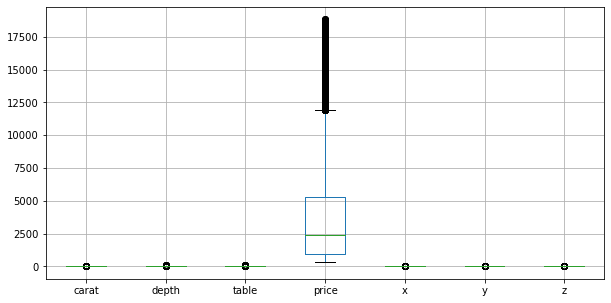

In [9]:
plt.figure(figsize=(10,5))
df.boxplot()

##### *Label Encoding*

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["clarity"]=le.fit_transform(df["clarity"])
df["cut"]=le.fit_transform(df["cut"])
df["color"]=le.fit_transform(df["color"])

##### *Clipping of Columns*

In [11]:
def clipValues(df,lower,upper):
    for col in df.columns:
        l=df[col].quantile(lower) 
        u=df[col].quantile(upper)
        df[col]=df[col].clip(l,u)
    return df

<AxesSubplot:>

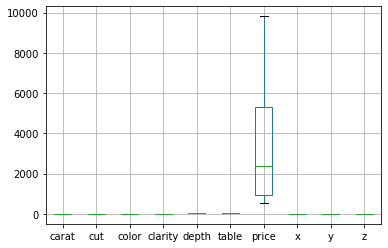

In [12]:
data=df
data=clipValues(data,0.05,0.9)
data.boxplot()

In [13]:
data.shape

(53794, 10)

In [14]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

##### Plots of Independent Variable vs Dependent Variables

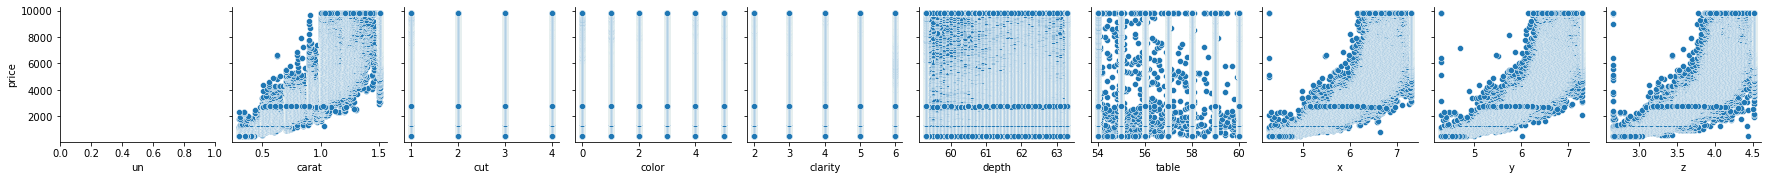

In [15]:
sns.pairplot(x_vars=['un','carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y','z'], y_vars=['price'], data=data)

##### Correlation Plot


<AxesSubplot:>

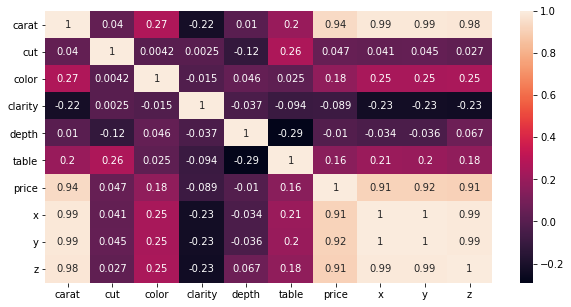

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

##### *Removing multicolinearity using vif*

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif(df):
    d={}
    for i in range(df.shape[1]):
        d[df.columns[i]]=variance_inflation_factor(df.values,i)
    return d     

In [18]:
X=data
get_vif(X)

{'carat': 305.163888570291,
 'cut': 8.842431393132898,
 'color': 4.202832304598529,
 'clarity': 9.437599625656327,
 'depth': 1324.589884907432,
 'table': 937.8439343938647,
 'price': 28.73758226310985,
 'x': 13036.95899813395,
 'y': 11981.95077276763,
 'z': 3518.934847530348}

##### *Dropping x column to decrease vif*

In [19]:
X=X.drop(columns="x")
get_vif(X)

{'carat': 298.7677177512331,
 'cut': 8.780532947203971,
 'color': 4.195412378013915,
 'clarity': 9.433313560467754,
 'depth': 1304.9930597712898,
 'table': 889.3034013633788,
 'price': 28.36871181059016,
 'y': 2532.150496750786,
 'z': 3354.750234810538}

In [20]:
x=data.drop(columns="price")
y=data["price"]

##### *Splitting Dataset into Training and Testing Data*

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

##### Calculation of residuals

In [22]:
from sklearn.linear_model import LinearRegression
model_for_residual=LinearRegression()
model_for_residual.fit(xtrain,ytrain)
ypred=model_for_residual.predict(xtrain)

In [23]:
residuals=ytrain.values-ypred

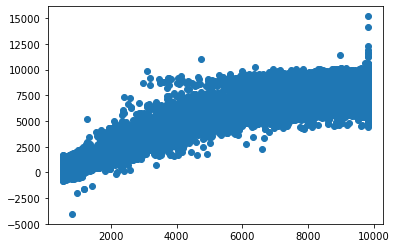

In [24]:
#scatter plot of residuals vs fitted values
plt.scatter(ytrain.values,ypred)

##### Residuals don't have constant variance. Hence we can say there exists Heteroscedasticity.

<AxesSubplot:ylabel='Count'>

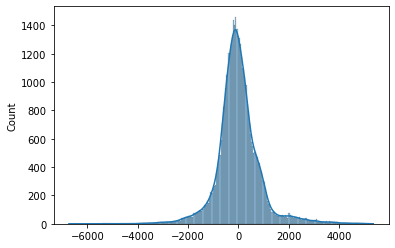

In [44]:
sns.histplot(residuals,kde=True)

In [45]:
np.mean(residuals)

5.054622210118155e-12

##### *The value for mean of residuals is almost equal to : 0.00291676661*

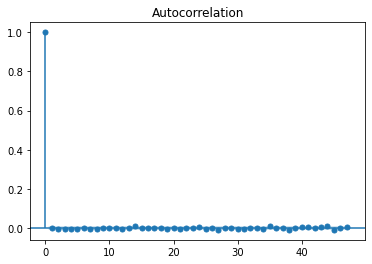

In [26]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals)
plt.show()

## Linear Regression

##### *Fit Linear Regression Model*

In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

##### Evaluation for Linear Regression 

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Evaluation for Linear Regression :")
print("Training data score:",model.score(xtrain,ytrain))
print("Testing data score:",model.score(xtest,ytest))
r2=r2_score(ytest,ypred)
print("Actual and Predicted data score: " ,r2)
print("Mean_absolute_error : ",mean_absolute_error(ytest,ypred))
print("Mean_squared_error : ",mean_squared_error(ytest,ypred))

Evaluation for Linear Regression :
Training data score: 0.919781539260351
Testing data score: 0.9159618405309745
Actual and Predicted data score:  0.9159618405309745
Mean_absolute_error :  602.711457121818
Mean_squared_error :  784457.1903337023


#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Evaluation Results for linear regression model :
#### R-square : 0.9159618405309744
#### Mean squared error : 784457.190333703
#### Root mean squared error : 885.695879144587
#### Mean absolute error : 602.711457121817
#### Training data score : 0.919781539260351
#### Testing data score : 0.9159618405309744
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#####  Scaling of Data using Standard Scalar

In [29]:
sc_X = X
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_X=sc.fit_transform(sc_X)
sc_X=pd.DataFrame(sc_X,columns=X.columns)

In [30]:
sc_X.head()

,carat,cut,color,clarity,depth,table,price,y,z
0,-1.170030,-0.604256,-0.958361,-0.545715,-0.185323,-1.256408,-0.98766,-1.378238,-1.374245
1,-1.170030,0.431045,-0.958361,-1.225776,-1.714735,1.485384,-0.98766,-1.378238,-1.374245
2,-1.170030,-1.639557,-0.958361,0.134346,-2.164562,1.485384,-0.98766,-1.378238,-1.374245
3,-1.170030,0.431045,1.527940,0.814407,0.624366,0.388667,-0.98766,-1.378238,-1.374245
4,-1.145094,-1.639557,1.527940,-0.545715,1.434055,0.388667,-0.98766,-1.328732,-1.215237


In [31]:
x=sc_X.drop(columns="price")
y=sc_X["price"]

In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

##### Making Linear Regression Model for Scaled Data 

In [33]:
model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

##### Evaluation for Linear Regression (scaled data)

In [56]:
print("Evaluation for Linear Regression(scaled data):")
print("Training data score:",model.score(xtrain,ytrain))
print("Testing data score:",model.score(xtest,ytest))
print("r2_score:",r2_score(ytest,ypred))
print("Actual and Predicted data score: " ,r2)
print("Mean_absolute_error : ",mean_absolute_error(ytest,ypred))
print("Mean_squared_error : ",mean_squared_error(ytest,ypred))
print("Root_Mean_squared_error : ",np.sqrt(mean_squared_error(ytest,ypred)))


Evaluation for Linear Regression(scaled data):
Training data score: 0.9181622090535848
Testing data score: 0.9149463999073728
r2_score: 0.9149463999073728
Actual and Predicted data score:  0.9149463999073728
Mean_absolute_error :  0.19795333801207768
Mean_squared_error :  0.0847638660181593
Root_Mean_squared_error :  0.29114234665908584


##### These are the Evaluation Results for  Linear Regression (scaled data)

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Evaluation for linear regression model (scaled data) :
#### R-square : 0.9159618405309744
#### Mean squared error : 784457.190333703
#### Root mean squared error : 885.695879144587
#### Mean absolute error : 602.711457121817
#### Training data score : 0.919781539260351
#### Testing data score : 0.9159618405309744
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Polynomial Regression

##### Making model for Polynomial Regression and Evaluating for the results

In [35]:
degree = [2,3,4,5]
from sklearn.preprocessing import PolynomialFeatures
scores={}
def get_best_degree(degree):
    for i in degree:
        poly_reg = PolynomialFeatures(degree=i)
        poly_xtrain = poly_reg.fit_transform(xtrain)
        poly_xtest = poly_reg.fit_transform(xtest)
        polylin_reg = LinearRegression()
        polylin_reg.fit(poly_xtrain, ytrain)
        ypred = polylin_reg.predict(poly_xtest)
        mse=mean_squared_error(ytest,ypred)
        rmse=np.sqrt(mse)
        mae=mean_absolute_error(ytest,ypred)
        scores[i]=r2_score(ytest,ypred)
        print(''' For degree = {} |R-square :{} |MSE :{} |RMSE :{} |MAE:{}
                 Train_Score :{}  |Test_Score :{}'''.format(i,r2_score(ytest,ypred),mse,rmse,mae,polylin_reg.score(poly_xtrain,ytrain),polylin_reg.score(poly_xtest,ytest)))
    return max(scores, key= lambda x: scores[x])

##### These are the degrees and their respective evaluation scores 

In [36]:
print(">>>>Best degree is :",get_best_degree(degree))

 For degree = 2 |R-square :0.9404939285496603 |MSE :0.059303364727542385 |RMSE :0.24352282177968945 |MAE:0.1596814995836793
                 Train_Score :0.9429591259415022  |Test_Score :0.9404939285496603
 For degree = 3 |R-square :0.9514592275767563 |MSE :0.04837541886082318 |RMSE :0.21994412667953464 |MAE:0.14052492720523724
                 Train_Score :0.953826924060969  |Test_Score :0.9514592275767563
 For degree = 4 |R-square :0.9460574684816555 |MSE :0.053758776927981484 |RMSE :0.2318593904244154 |MAE:0.11988895378742272
                 Train_Score :0.9656770121117033  |Test_Score :0.9460574684816555
 For degree = 5 |R-square :-0.005691218656943331 |MSE :1.0022653435132605 |RMSE :1.0011320310095269 |MAE:0.12126980977993548
                 Train_Score :0.9711004076752061  |Test_Score :-0.005691218656943331
>>>>Best degree is : 3


##### According to the results and evaluation the best degree is 3

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Best evaluation for polynomial regression model :
#### degree = 3
#### R-square : 0.9514592275767565
#### Mean squared error : 0.048375418860823007
#### Root mean squared error : 0.21994412667953425
#### Mean absolute error : 0.1405249272052379
#### Training data score : 0.953826924060969
#### Testing data score : 0.9460574567825059
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Ridge Regression

##### Making model for Ridge Regression and Evaluating for the results

In [37]:
poly_reg = PolynomialFeatures(degree=3)
poly_xtrain = poly_reg.fit_transform(xtrain)
poly_xtest = poly_reg.fit_transform(xtest)

In [38]:
alpha = [0.0001,0.001,0.01,0.1,0.3,0.5,1,10]
from sklearn.linear_model import Ridge
scores={}
def get_best_alpha(alpha):
    for i in alpha:
        ridge=Ridge(alpha=i)
        ridge.fit(poly_xtrain,ytrain)
        ypred=ridge.predict(poly_xtest)
        mse=mean_squared_error(ytest,ypred)
        rmse=np.sqrt(mse)
        mae=mean_absolute_error(ytest,ypred)
        scores[i]=r2_score(ytest,ypred)
        print(''' For Alpha = {} |R-square :{} |MSE :{} |RMSE :{} |MAE:{}
                 Train_Score :{}  |Test_Score :{}'''.format(i,r2_score(ytest,ypred),mse,rmse,mae,ridge.score(poly_xtrain,ytrain),ridge.score(poly_xtest,ytest)))
    return max(scores, key= lambda x: scores[x])

##### These are the degrees and their respective evaluation scores

In [39]:
print(">>>>Best  alpha is :",get_best_alpha(alpha))

 For Alpha = 0.0001 |R-square :0.951459293467214 |MSE :0.04837535319482053 |RMSE :0.21994397740065658 |MAE:0.14052488379037742
                 Train_Score :0.9538269240597079  |Test_Score :0.951459293467214
 For Alpha = 0.001 |R-square :0.9514598835355156 |MSE :0.04837476513657958 |RMSE :0.21994264056016874 |MAE:0.14052449392558397
                 Train_Score :0.9538269239355204  |Test_Score :0.9514598835355156
 For Alpha = 0.01 |R-square :0.9514655062912211 |MSE :0.048369161534724356 |RMSE :0.21992990141116409 |MAE:0.14052069848204607
                 Train_Score :0.95382691213829  |Test_Score :0.9514655062912211
 For Alpha = 0.1 |R-square :0.9515030973772572 |MSE :0.04833169850227455 |RMSE :0.21984471451975948 |MAE:0.14049339080107612
                 Train_Score :0.9538261308128099  |Test_Score :0.9515030973772572
 For Alpha = 0.3 |R-square :0.951537779537159 |MSE :0.04829713448673687 |RMSE :0.21976609039325623 |MAE:0.14045445182652905
                 Train_Score :0.9538228110177

##### According to the results and evaluation the best alpha is 1

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Best result for Ridge model :
#### alpha = 1
#### R-square : 0.9515638772017413 
#### Mean squared error : 0.04827112572353774
#### Root mean squared error : 0.2197069086841325 
#### Mean absolute error : 0.14037650495556972
#### Training data score : 0.9538081005922283  
#### Testing data score : 0.9515638772017413
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Lasso Regresssion

##### Making model for Lasso Regression and Evaluating for the results

In [40]:
alpha = [0.0001,0.001,0.01,0.1,0.3,0.5,1,10]
from sklearn.linear_model import Lasso
scores={}
def get_best_alpha(alpha):
    for i in alpha:
        lasso=Lasso(alpha=i)
        lasso.fit(poly_xtrain,ytrain)
        ypred=lasso.predict(poly_xtest)
        mse=mean_squared_error(ytest,ypred)
        rmse=np.sqrt(mse)
        mae=mean_absolute_error(ytest,ypred)
        scores[i]=r2_score(ytest,ypred)
        print(''' For Alpha = {} |R-square :{} |MSE :{} |RMSE :{} |MAE:{}
                 Train_Score :{}  |Test_Score :{}'''.format(i,r2_score(ytest,ypred),mse,rmse,mae,lasso.score(poly_xtrain,ytrain),lasso.score(poly_xtest,ytest)))
    return max(scores, key= lambda x: scores[x])

##### These are the degrees and their respective evaluation scores

In [41]:
print(">>>>Best  alpha is :",get_best_alpha(alpha))

C:\Users\SHREE\new anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 356.09137324682797, tolerance: 4.307147235375249
  model = cd_fast.enet_coordinate_descent(


 For Alpha = 0.0001 |R-square :0.9511659980959231 |MSE :0.04866764945892669 |RMSE :0.22060745558327507 |MAE:0.14012171162669457
                 Train_Score :0.9532619584034819  |Test_Score :0.9511659980959231


C:\Users\SHREE\new anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.475186685014023, tolerance: 4.307147235375249
  model = cd_fast.enet_coordinate_descent(


 For Alpha = 0.001 |R-square :0.9496011548885105 |MSE :0.0502271620466136 |RMSE :0.2241141719004258 |MAE:0.1400931792974014
                 Train_Score :0.9514071693179834  |Test_Score :0.9496011548885105
 For Alpha = 0.01 |R-square :0.9392255779157918 |MSE :0.06056739474010152 |RMSE :0.24610443868427387 |MAE:0.15515361185581025
                 Train_Score :0.9414864858773598  |Test_Score :0.9392255779157918
 For Alpha = 0.1 |R-square :0.8745917591130963 |MSE :0.12498103920979135 |RMSE :0.353526574969678 |MAE:0.2375721401552508
                 Train_Score :0.8758230768298008  |Test_Score :0.8745917591130963
 For Alpha = 0.3 |R-square :0.75736008126731 |MSE :0.2418133687429608 |RMSE :0.49174522747349647 |MAE:0.37029723477569143
                 Train_Score :0.7564351349092743  |Test_Score :0.75736008126731
 For Alpha = 0.5 |R-square :0.6981039053546038 |MSE :0.30086768919903883 |RMSE :0.5485140738386198 |MAE:0.4446704392030442
                 Train_Score :0.696391959630413  |Test_Sc

##### According to the results and evaluation the best alpha is 0.0001

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Best result for Lasso model :
#### alpha = 0.0001
#### R-square : 0.9511659980959231 
#### Mean squared error : 0.04866764945892669 
#### Root mean squared error : 0.22060745558327507 
#### Mean absolute error : 0.14012171162669454
#### Training data score : 0.9532619584034819  
#### Testing data score : 0.9511659980959231
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## ElasticNet Regression

##### Making model for ElasticNet Regression and Evaluating for the results

In [42]:
alpha = [0.0001,0.001,0.01,0.1,0.3,0.5,1,10]
from sklearn.linear_model import ElasticNet
scores={}
def get_best_alpha(alpha):
    for i in alpha:
        elasticnet=ElasticNet(alpha=i)
        elasticnet.fit(poly_xtrain,ytrain)
        ypred=elasticnet.predict(poly_xtest)
        mse=mean_squared_error(ytest,ypred)
        rmse=np.sqrt(mse)
        mae=mean_absolute_error(ytest,ypred)
        scores[i]=r2_score(ytest,ypred)
        print(''' For Alpha = {} |R-square :{} |MSE :{} |RMSE :{} |MAE:{}
                 Train_Score :{}  |Test_Score :{}'''.format(i,r2_score(ytest,ypred),mse,rmse,mae,elasticnet.score(poly_xtrain,ytrain),elasticnet.score(poly_xtest,ytest)))
    return max(scores, key= lambda x: scores[x])

##### These are the degrees and their respective evaluation scores

In [43]:
print(">>>>Best  alpha is :",get_best_alpha(alpha))

C:\Users\SHREE\new anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 669.996354442256, tolerance: 4.307147235375249
  model = cd_fast.enet_coordinate_descent(


 For Alpha = 0.0001 |R-square :0.9512206403907978 |MSE :0.0486131933023778 |RMSE :0.22048399783743447 |MAE:0.1401586492249919
                 Train_Score :0.9533536932031018  |Test_Score :0.9512206403907978


C:\Users\SHREE\new anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63.65703302571501, tolerance: 4.307147235375249
  model = cd_fast.enet_coordinate_descent(


 For Alpha = 0.001 |R-square :0.950466266500395 |MSE :0.04936499742711876 |RMSE :0.22218235174540474 |MAE:0.13987482850620298
                 Train_Score :0.952358340729561  |Test_Score :0.950466266500395
 For Alpha = 0.01 |R-square :0.9426812523670626 |MSE :0.057123492002640726 |RMSE :0.23900521333778627 |MAE:0.15092139832043855
                 Train_Score :0.9445371950179299  |Test_Score :0.9426812523670626
 For Alpha = 0.1 |R-square :0.8989110756507044 |MSE :0.10074456613396542 |RMSE :0.3174028451888316 |MAE:0.21740791813424123
                 Train_Score :0.9002521497361582  |Test_Score :0.8989110756507044
 For Alpha = 0.3 |R-square :0.8268801352883182 |MSE :0.17253013395696218 |RMSE :0.4153674685828949 |MAE:0.2948630059153315
                 Train_Score :0.8267577938766681  |Test_Score :0.8268801352883182
 For Alpha = 0.5 |R-square :0.7671645981545376 |MSE :0.23204225082559268 |RMSE :0.4817076404060794 |MAE:0.35691930607182215
                 Train_Score :0.766131625290018  |

##### According to the results and evaluation the best alpha is 0.0001

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Best result for ElasticNet model :
#### alpha = 0.0001
#### R-square : 0.9512206403907978 
#### Mean squared error : 0.048613193302377816
#### Root mean squared error : 0.2204839978374345 
#### Mean absolute error : 0.1401586492249919
#### Training data score : 0.9533536932031018  
#### Testing data score : 0.9512206403907978
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### FINAL EVALUATION RESULTS AND MODEL PERFORMANCES 

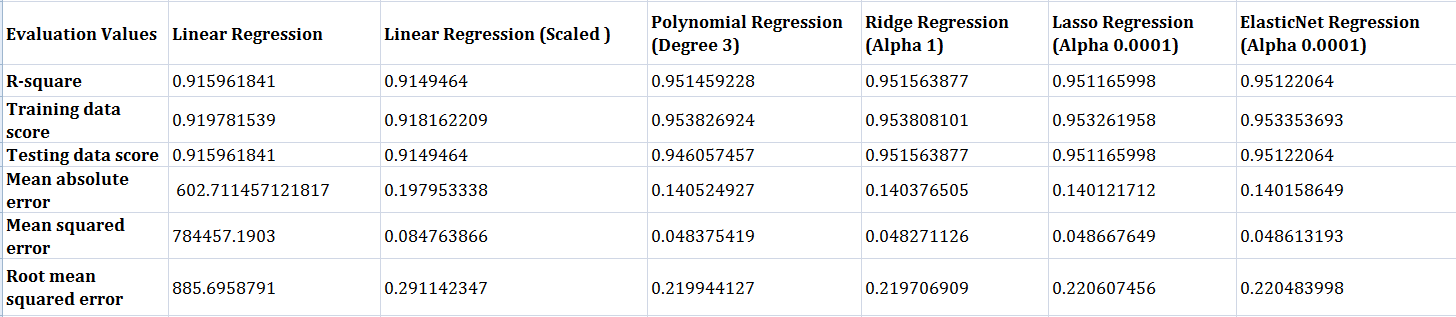

### CONCLUSION

###### From the above table we can conclude that the best model is of RIDGE REGRESSION